# IMPORTING MODULES

In [159]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# LOADING GAME DATA

In [160]:
games=pd.read_csv("D:/Study/Datasets/Board Game Review/games.csv")
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


# DATA INSIGHT

In [161]:
# Names of the columns in Dataset

for i,col in enumerate(games.columns):
    print(i+1,"Column is ",col)

1 Column is  id
2 Column is  type
3 Column is  name
4 Column is  yearpublished
5 Column is  minplayers
6 Column is  maxplayers
7 Column is  playingtime
8 Column is  minplaytime
9 Column is  maxplaytime
10 Column is  minage
11 Column is  users_rated
12 Column is  average_rating
13 Column is  bayes_average_rating
14 Column is  total_owners
15 Column is  total_traders
16 Column is  total_wanters
17 Column is  total_wishers
18 Column is  total_comments
19 Column is  total_weights
20 Column is  average_weight


In [162]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [163]:
'''looking at the coloumns we are most interested in average_rating and that's what we are going to predict
   average_weight is the most important factor in predicting as it defines the complexity of the games more the weight more complex the games'''

"looking at the coloumns we are most interested in average_rating and that's what we are going to predict\n   average_weight is the most important factor in predicting as it defines the complexity of the games more the weight more complex the games"

In [164]:
# Shape of the Dataset

print("Total Number of Rows in Dataset:",games.shape[0])
print("Total Number of Columns in Dataset:",games.shape[1])

# so we have 81,312 different board games 

Total Number of Rows in Dataset: 81312
Total Number of Columns in Dataset: 20


In [165]:
# Info. of the Dataset

print(games.info())

# so we colmns with missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [166]:
# Total missing values

print("Total Missing value in Dataset :\n", games.isnull().sum())

Total Missing value in Dataset :
 id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64


In [167]:
# Dataset Description

games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


# DATA CLEANING AND VISUALIZATION

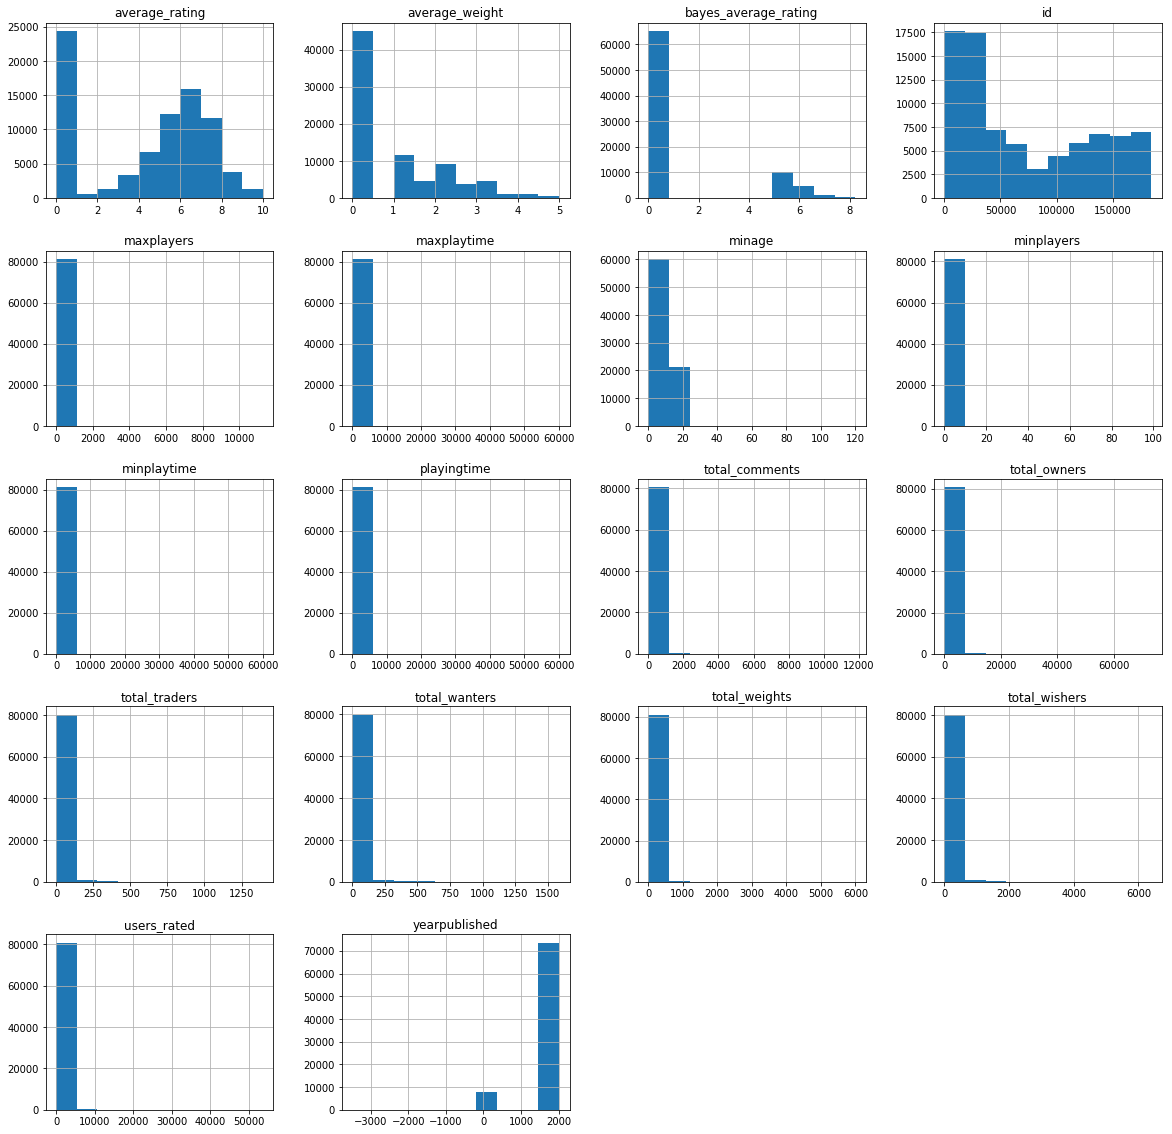

In [168]:
# Histogram Visualization

games.hist(figsize=(20,20))
plt.show()

In [169]:
# First row of all the games with zero score

print(games[games["average_rating"]==0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [170]:
# First row of all the games with score greater than zero

print(games[games["average_rating"] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [171]:
# remove any row without user review

games=games[games["users_rated"] > 0]

In [172]:
#removing any row with missing value

games=games.dropna(axis=0)

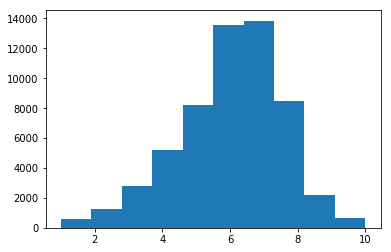

In [173]:
# New Histogram for Average_Rating

plt.hist(games["average_rating"])
plt.show()

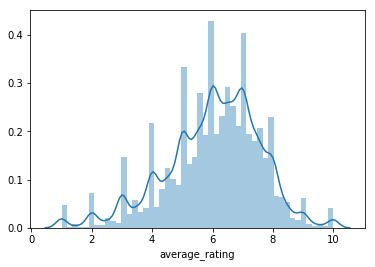

In [174]:
# Dist Plot

sns.distplot(games["average_rating"])

# BUILDING PREDICTION MODEL

In [175]:
# Removing ID column

games.drop(['id'],axis=1,inplace=True)


In [176]:
# Correlation 

corr=games.corr(method ='pearson') 
corr

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
yearpublished,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081
bayes_average_rating,0.140998,0.034915,-0.003437,0.045341,0.041845,0.045341,0.266937,0.317992,0.231563,1.000000,0.371017,0.455021,0.426708,0.377213,0.371031,0.313302,0.482356


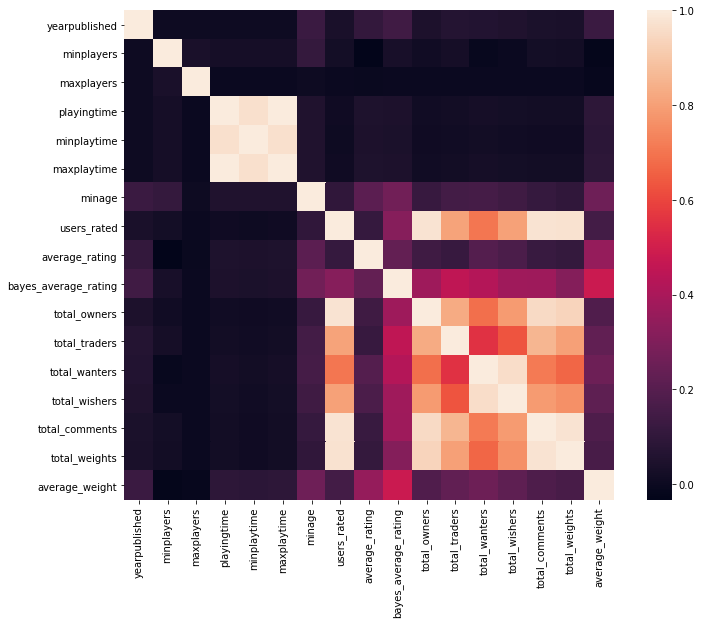

In [177]:
# Correalation Matrix
# Correlation Heatmap Using seaborn library

fig = plt.figure(figsize=(12,9))

sns.heatmap(corr,square=True)
plt.show()

In [178]:
# Get all the columns from Dataset

columns = games.columns.tolist()
columns

['type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [179]:
# Filter the Column to remove columns we dont want

columns=[c for c in columns if c not in ['bayes_average_rating','average_rating','type','name',]]

In [180]:
# Storing the variable we will be predicting on

target="average_rating"

# DEVELOPING MODEL

In [215]:
# Splitting Data In Training Set and Test Set 

from sklearn.model_selection import train_test_split

# Training Data

train = games.sample(frac=0.8,random_state=1)


# Testing Data

test = games.loc[~games.index.isin(train.index)]

In [216]:
# Shape of Test and Train

print(train.shape)

print(test.shape)

(45515, 19)
(11379, 19)


# Linear Regression

In [217]:
# Importing Linear regression model

from sklearn.linear_model import LinearRegression

# Importing Model Evaluation Matrix

from sklearn.metrics import mean_squared_error

In [218]:
# Initializing Model Class

LR=LinearRegression()

# Fitting the Model the Training Data

LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [219]:
# Generating Prediction for Test Data

prediction = LR.predict(test[columns])

In [220]:
# Computation of ERROR

mean_squared_error(prediction, test[target])

2.0788190326293243

 # Random Forest
 

In [221]:
#Importing Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [222]:
# Model Initialization

RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)


In [223]:
# Firring to Data

RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [224]:
# Prediction
pred2 = RFR.predict(test[columns])

In [225]:
# Computation of ERROR

mean_squared_error(pred2, test[target])

1.4458560046071653